# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import time
import requests
import numpy as np
import pandas as pd
from citipy import citipy             # Import citipy to determine the cities based on latitude and longitude
import matplotlib.pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key  # Impor the OpenWeatherMap API key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_name_encoded = city.replace(" ", "%20")
    city_url = f"{url}q={city_name_encoded}&units={units}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url).json()
        city_weather = city_response["weather"]  # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_response["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_response["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_response["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_response["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_response["wind"]["speed"] # YOUR CODE HERE
        city_country = city_response["sys"]["country"] # YOUR CODE HERE
        city_date = city_response["dt"] # YOUR CODE HERE
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | san juan de miraflores
Processing Record 3 of Set 1 | bouna
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | mrakovo
Processing Record 6 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | prineville
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | ad dabbah
Processing Record 14 of Set 1 | talara
Processing Record 15 of Set 1 | al badari
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | bikenibeu village
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | afaahiti
Processing Rec

Processing Record 39 of Set 4 | bethanie
Processing Record 40 of Set 4 | kuanda
Processing Record 41 of Set 4 | enewetak
Processing Record 42 of Set 4 | raja
Processing Record 43 of Set 4 | utrik
Processing Record 44 of Set 4 | barranca
Processing Record 45 of Set 4 | taiohae
City not found. Skipping...
Processing Record 46 of Set 4 | mafraq
Processing Record 47 of Set 4 | whistler
Processing Record 48 of Set 4 | pipar
Processing Record 49 of Set 4 | labytnangi
Processing Record 0 of Set 5 | hadibu
Processing Record 1 of Set 5 | kabalo
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | grovedale
Processing Record 4 of Set 5 | bouca
Processing Record 5 of Set 5 | natal
Processing Record 6 of Set 5 | colombo
Processing Record 7 of Set 5 | doctor juan leon mallorquin
Processing Record 8 of Set 5 | lewisville
Processing Record 9 of Set 5 | chesma
Processing Record 10 of Set 5 | mersing
Processing Record 11 of Set 5 | newman
Processing Record 12 of Set 5 | eenhana
Proce

Processing Record 30 of Set 8 | saint-pierre-du-mont
Processing Record 31 of Set 8 | tanumah
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | san juan
Processing Record 34 of Set 8 | quellon
Processing Record 35 of Set 8 | alofi
Processing Record 36 of Set 8 | nuevitas
Processing Record 37 of Set 8 | belel
Processing Record 38 of Set 8 | kyabe
Processing Record 39 of Set 8 | rio grande
Processing Record 40 of Set 8 | black point
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | encheng
Processing Record 43 of Set 8 | lorengau
Processing Record 44 of Set 8 | kulia village
City not found. Skipping...
Processing Record 45 of Set 8 | kapuskasing
Processing Record 46 of Set 8 | sochi
Processing Record 47 of Set 8 | sao francisco
Processing Record 48 of Set 8 | quibala
Processing Record 49 of Set 8 | nadi
Processing Record 0 of Set 9 | margate
Processing Record 1 of Set 9 | tharad
Processing Record 2 of Set 9 | prairie grove
Processing Record 3

Processing Record 18 of Set 12 | kankakee
Processing Record 19 of Set 12 | dubbo
Processing Record 20 of Set 12 | khovd
Processing Record 21 of Set 12 | nasiriyah
Processing Record 22 of Set 12 | padam
City not found. Skipping...
Processing Record 23 of Set 12 | tyukhtet
Processing Record 24 of Set 12 | durango
Processing Record 25 of Set 12 | alto araguaia
Processing Record 26 of Set 12 | toliara
Processing Record 27 of Set 12 | paraparaumu
Processing Record 28 of Set 12 | bouarfa
Processing Record 29 of Set 12 | visby
Processing Record 30 of Set 12 | bogale
Processing Record 31 of Set 12 | luzino
Processing Record 32 of Set 12 | meadow lake
Processing Record 33 of Set 12 | yur'yevets
Processing Record 34 of Set 12 | carbonear
Processing Record 35 of Set 12 | hanak
Processing Record 36 of Set 12 | island harbour
Processing Record 37 of Set 12 | codrington
Processing Record 38 of Set 12 | san andros
City not found. Skipping...
Processing Record 39 of Set 12 | gejiu
Processing Record 40

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,80,8,3.13,NZ,1687492044
1,san juan de miraflores,-12.1629,-76.9635,20.29,81,77,4.54,PE,1687492045
2,bouna,9.2667,-3.0000,21.77,88,63,2.97,CI,1687492045
3,kodiak,57.7900,-152.4072,9.73,93,100,2.06,US,1687492003
4,mrakovo,52.7161,56.6244,11.52,66,100,1.44,RU,1687492045


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_mywork.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_mywork.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,80,8,3.13,NZ,1687492044
1,san juan de miraflores,-12.1629,-76.9635,20.29,81,77,4.54,PE,1687492045
2,bouna,9.2667,-3.0000,21.77,88,63,2.97,CI,1687492045
3,kodiak,57.7900,-152.4072,9.73,93,100,2.06,US,1687492003
4,mrakovo,52.7161,56.6244,11.52,66,100,1.44,RU,1687492045


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

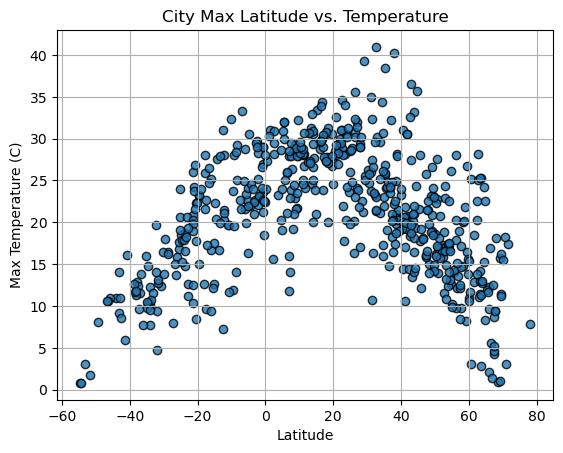

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties

# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1_mywork.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

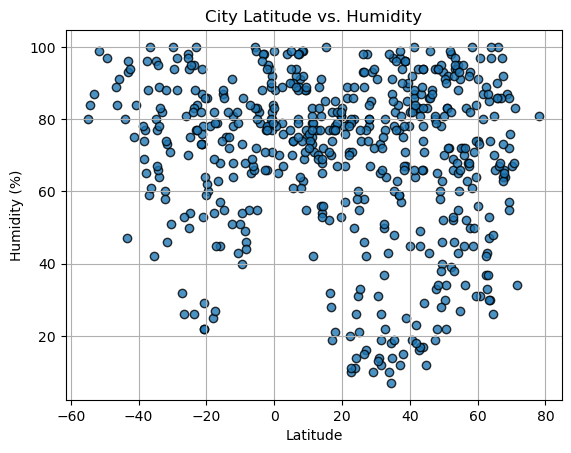

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_mywork.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

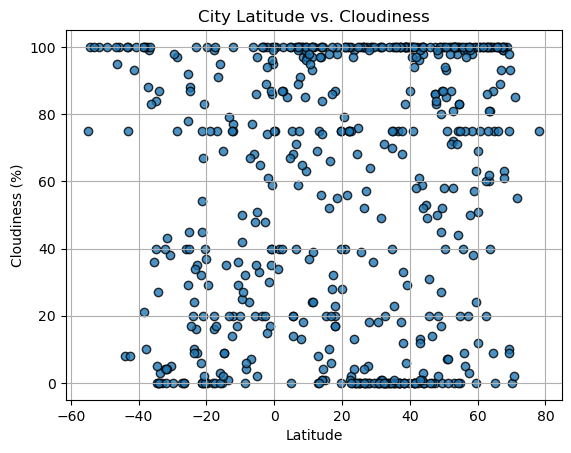

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black', alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_mywork.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

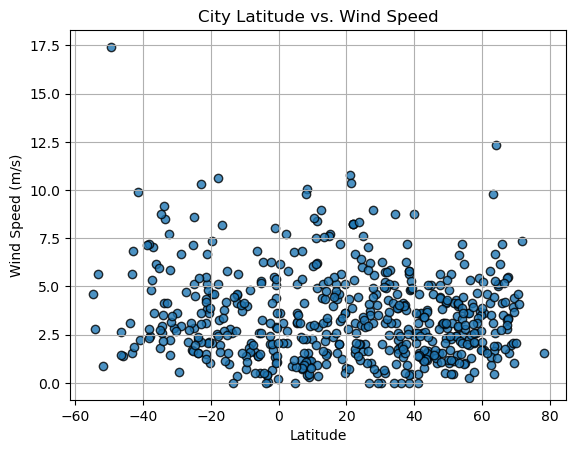

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black', alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_mywork.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_lin_regress_plot(x_data, y_data, x_label, y_label, hemisphere_label):
    # 1. Do the linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # 2. Obtain the linear regression predicted values
    regress_values = x_data * slope + intercept
    
    # 3. Assemble the line euqation as a string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 4. Plot the scatter plot
    plt.scatter(x_data, y_data, s = 35,  marker="o") #, alpha=0.9) # color = "blue",
    
    # 5. Plot the regression line    
    plt.plot(x_data, regress_values, "r-") #, label="2018")
    
    # 6. Plot the annotation
    x_offset = 0
    y_offset = 0
    
    if (slope >= -1 and slope <= 0):
        x_offset = min(x_data)
        y_offset = min(y_data)+5
    elif (slope > 0 and slope < 1) :
        x_offset = min(x_data)
        y_offset = max(y_data)-5
    
    plt.annotate(line_eq,(x_offset, y_offset), fontsize=15,color="red")
    
    # 7. Plot the labels
    plt.title(f"{hemisphere_label}: {y_label} vs. {x_label}")
    plt.xlabel(f"{x_label}", fontsize = 10)
    plt.ylabel(f"{y_label}", fontsize = 10)    
    print(f"The r-value is: {r_value}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bouna,9.2667,-3.0000,21.77,88,63,2.97,CI,1687492045
3,kodiak,57.7900,-152.4072,9.73,93,100,2.06,US,1687492003
4,mrakovo,52.7161,56.6244,11.52,66,100,1.44,RU,1687492045
6,prineville,44.2999,-120.8345,24.39,29,0,3.09,US,1687492046
8,fortuna,40.5982,-124.1573,14.40,92,100,2.06,US,1687492047


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,80,8,3.13,NZ,1687492044
1,san juan de miraflores,-12.1629,-76.9635,20.29,81,77,4.54,PE,1687492045
5,adamstown,-25.0660,-130.1015,20.63,50,45,8.60,PN,1687492046
7,isangel,-19.5500,169.2667,23.10,60,29,4.63,VU,1687492047
9,mount gambier,-37.8333,140.7667,12.83,65,10,2.44,AU,1687492047


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6609606326560075


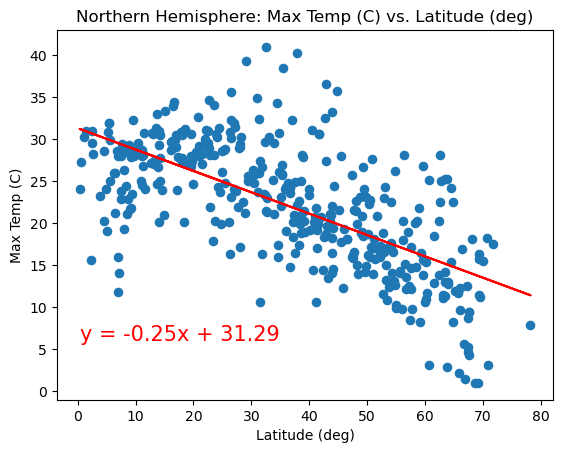

In [26]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude (deg)","Max Temp (C)", "Northern Hemisphere") 

The r-value is: 0.7665504210770401


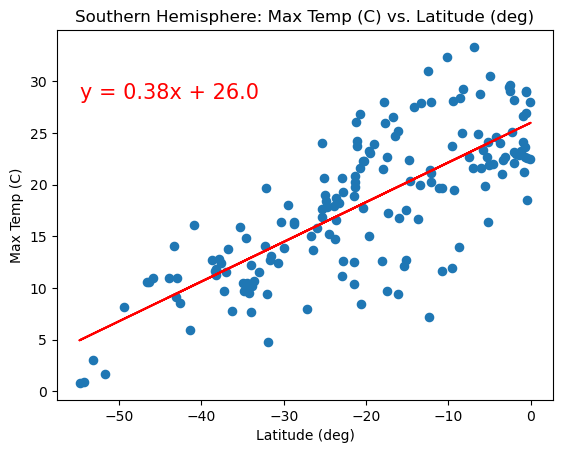

In [27]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude (deg)","Max Temp (C)", "Southern Hemisphere") 

**Discussion about the linear relationship:** These graphs are modelling the relationship between maximum temperature and latitude for cities in the Northern and the Southern hemisphere. The graph for the Northern Max Temp vs Latitude shows moderate negative correlation with r = -0.66. It implies that cities at higher latitude (toward North pole) tend to have lower Max temperature.
In the Southern Hemisphere Max Temp vs Latitude graph, the linear relationship is strong with r = 0.76. That means cities closer to the equator have higher Max Temp than those that are closer to the South pole.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07576991323501281


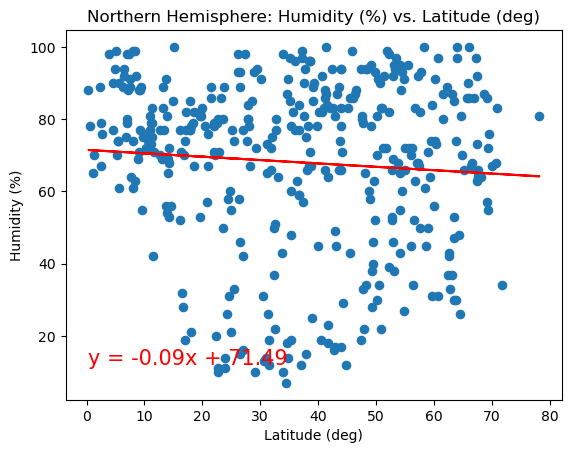

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude (deg)","Humidity (%)", "Northern Hemisphere") 

The r-value is: -0.05324425526471048


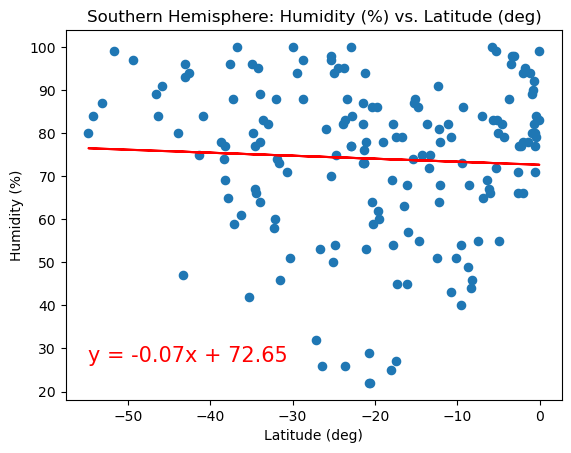

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude (deg)","Humidity (%)", "Southern Hemisphere") 

**Discussion about the linear relationship:** These graphs are modelling the relationship between humidity and latitude. Here in both Northern and Southern graphs, humidity is seen having very weak negative correlation with the latitude location of a city as inferred by the r values -0.076 and -0.053, respectively.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08277271788706772


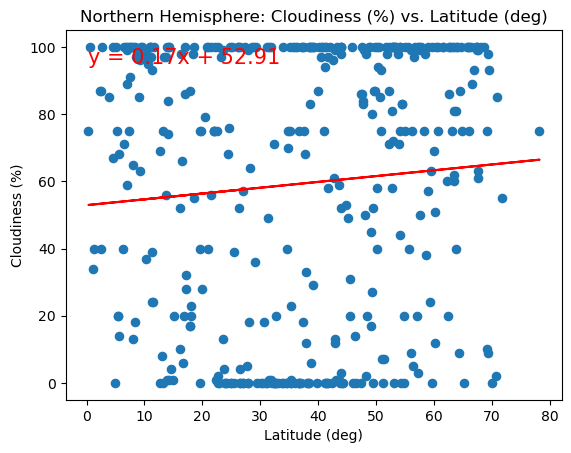

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude (deg)","Cloudiness (%)", "Northern Hemisphere")

The r-value is: -0.06360830812867749


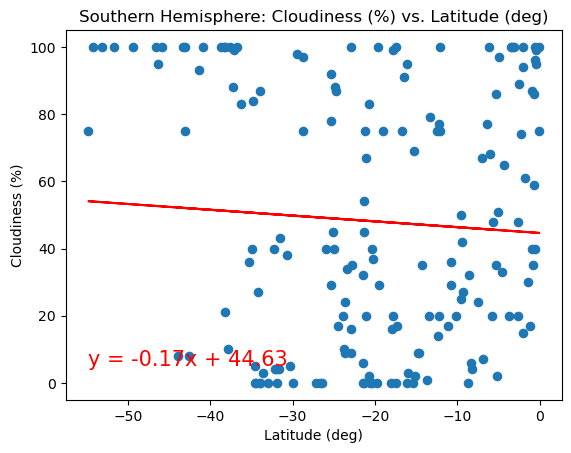

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude (deg)","Cloudiness (%)", "Southern Hemisphere") 

**Discussion about the linear relationship:** These graphs are modelling the relationship between cloudiness and latitude. In the Northern hemisphere, the correlation is very weak with r = 0.083. In the Southern hemisphere, it is a very weak negative correlation with r = -0.064.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06300401185027196


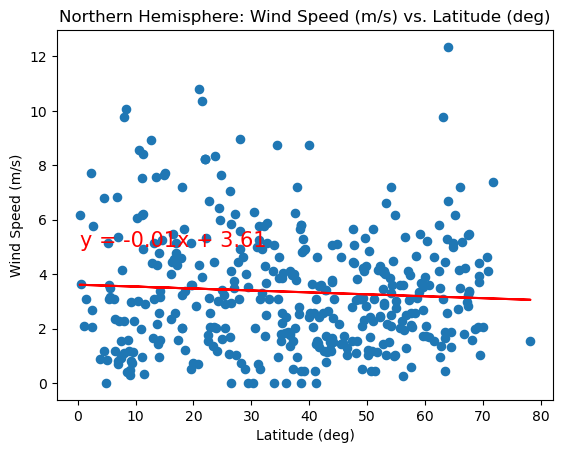

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude (deg)","Wind Speed (m/s)", "Northern Hemisphere")

The r-value is: -0.2756934011863897


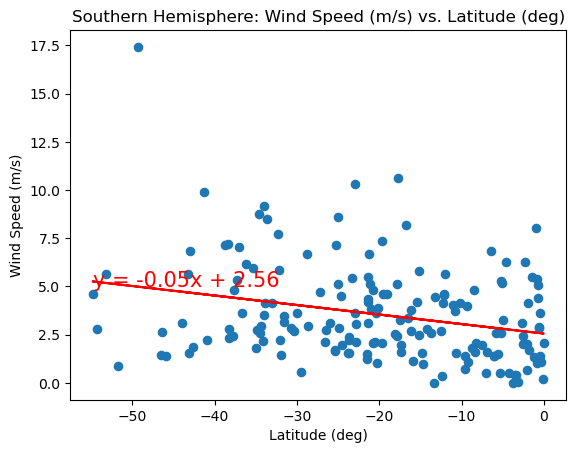

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude (deg)","Wind Speed (m/s)", "Southern Hemisphere")

**Discussion about the linear relationship:** These graphs are modelling the relationship between wind speed and latitude. These also have very weak negative correlations. However, in the Northern part, correlation is the weakest with r = -0.063 compared to that in the Southern part with r = -0.28.